<a href="https://colab.research.google.com/github/bjyrfqh/latihan1/blob/main/Latihan_1_Kelompok_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LATIHAN 1 KOMPUTASI STATISTIKA**
Anggota Kelompok :

*   Shafiyah Audiva Yasmin - 2106706880
*   Sanchia Natisha Kenzie - 2106724990
*   Yasmin Nashwa Alifya - 2106725040
*   Audrey Aliyya Marlavi - 2106725091
*   Rifqah Majidah Avisenna Nasution - 206725122




#**Case Study**
*The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups.*

Gunakan 20 Newsgroup data berikut ([Sumber Data](https://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups)). Bagaimana kita tahu topik apa yang dibicarakan dalam dokumen 20 Newsgroups tersebut? Mari lakukan implementasi *topic modelling* pada data tersebut.

**Imports**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from spacy.lang.en.stop_words import STOP_WORDS as stop_words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from scipy.linalg import svd
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option("display.max_colwidth", 200)

**Load data**

In [ ]:
# Load data
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [ ]:
# Look at the dataset
documents[:2]

["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
 "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap

In [ ]:
print("Total Documents: ", len(documents))

Total Documents:  11314


In [ ]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

**Preprocessing**

In [ ]:
# Load data from list to datafame for further processing.
news_df = pd.DataFrame({'document':documents})

# Removing everything except alphabets (i.e. the punctuations, numbers, and special characters) 
# and will replace them with blank space
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

# removing short words because they usually don’t contain useful information
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase to nullify case sensitivity.
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
# Load stopwords (here I used Spacy for stopwords you can also use NLTK)
from spacy.lang.en.stop_words import STOP_WORDS as stop_words

# tokenization - break sentences into words
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization - Join words to get back the sentences
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

**Document-Term Matrix**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape # check shape of the document-term matrix

(11314, 1000)

**Topic Modeling**

In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

In [ ]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ", end='', flush=True)
    for t in sorted_terms:
        print(t[0], end=' ', flush=True)
    print(" ")

Topic 0: like know people think good time thanks  
Topic 1: thanks windows card drive mail file advance  
Topic 2: game team year games season players good  
Topic 3: drive scsi hard disk card drives problem  
Topic 4: windows file window files program problem version  
Topic 5: government space chip mail information data encryption  
Topic 6: like bike chip sounds know looks look  
Topic 7: card sale video monitor offer price jesus  
Topic 8: know card chip video government people clipper  
Topic 9: good know time bike problem jesus work  
Topic 10: think good chip clipper need encryption people  
Topic 11: thanks problem right bike good window time  
Topic 12: good people windows know sale file files  
Topic 13: space think know nasa problem year israel  
Topic 14: space good card thanks people year nasa  
Topic 15: people problem game window time work want  
Topic 16: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


problem good window israel people know israeli  
Topic 17: file time problem need files mail game  
Topic 18: need right file card files want good  
Topic 19: need time windows want israel window israeli  


In [ ]:
from IPython.lib.display import YouTubeVideo
vsm = CountVectorizer(binary = False, lowercase=True, stop_words='english')
Y = vsm.fit_transform(terms)

Y.shape

(1000, 1000)

In [ ]:
type(Y)

scipy.sparse.csr.csr_matrix

In [ ]:
Y.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
# Solve dengan Numpy
U, s, V = np.linalg.svd(Y.toarray())
print("ukuran-ukuran matriks = ",U.shape, s.shape, V.shape)
print(s)

ukuran-ukuran matriks =  (1000, 1000) (1000,) (1000, 1000)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

In [ ]:
print(str(vsm.vocabulary_)[:93])

{'ability': 0, 'able': 1, 'accept': 2, 'access': 3, 'according': 4, 'account': 5, 'action': 6


Visualisasi

In [ ]:
# Mari kita plot hasil diatas

x_word = X[0,:] # Baris pertama matrix V = sumbu x kata
y_word = X[1,:] # Baris kedua matrix V = sumbu y kata

# label dari setiap barisnya = kata-kata
# kita akan gunakan perintah yang sama dengan di segmen sebelum ini
print(vsm.vocabulary_)

{'ability': 0, 'able': 1, 'accept': 2, 'access': 3, 'according': 4, 'account': 5, 'action': 6, 'actions': 7, 'actual': 8, 'actually': 9, 'added': 10, 'addition': 11, 'additional': 12, 'address': 13, 'administration': 14, 'advance': 15, 'advice': 16, 'agencies': 17, 'agree': 18, 'algorithm': 19, 'allow': 20, 'allowed': 21, 'allows': 22, 'amendment': 23, 'america': 24, 'american': 25, 'americans': 26, 'analysis': 27, 'angeles': 28, 'anonymous': 29, 'answer': 30, 'answers': 31, 'anti': 32, 'anybody': 33, 'apparently': 34, 'appear': 35, 'appears': 36, 'apple': 37, 'application': 38, 'applications': 39, 'apply': 40, 'appreciate': 41, 'appreciated': 42, 'approach': 43, 'appropriate': 44, 'april': 45, 'arab': 46, 'archive': 47, 'area': 48, 'areas': 49, 'aren': 50, 'argument': 51, 'arguments': 52, 'armenia': 53, 'armenian': 54, 'armenians': 55, 'arms': 56, 'army': 57, 'article': 58, 'articles': 59, 'asked': 60, 'asking': 61, 'assume': 62, 'assuming': 63, 'atheism': 64, 'atheists': 65, 'attack'

In [ ]:
index_kata = dict(map(reversed, vsm.vocabulary_.items()))
Label = [index_kata[i] for i in range(Y.shape[0])]
print(Label)

['ability', 'able', 'accept', 'access', 'according', 'account', 'action', 'actions', 'actual', 'actually', 'added', 'addition', 'additional', 'address', 'administration', 'advance', 'advice', 'agencies', 'agree', 'algorithm', 'allow', 'allowed', 'allows', 'amendment', 'america', 'american', 'americans', 'analysis', 'angeles', 'anonymous', 'answer', 'answers', 'anti', 'anybody', 'apparently', 'appear', 'appears', 'apple', 'application', 'applications', 'apply', 'appreciate', 'appreciated', 'approach', 'appropriate', 'april', 'arab', 'archive', 'area', 'areas', 'aren', 'argument', 'arguments', 'armenia', 'armenian', 'armenians', 'arms', 'army', 'article', 'articles', 'asked', 'asking', 'assume', 'assuming', 'atheism', 'atheists', 'attack', 'attempt', 'author', 'authority', 'available', 'average', 'avoid', 'away', 'background', 'base', 'baseball', 'based', 'basic', 'basically', 'basis', 'begin', 'beginning', 'belief', 'beliefs', 'believe', 'best', 'better', 'bible', 'bike', 'bios', 'bits'

In [ ]:
X_topics = svd_model.fit_transform(X)
embedding = TSNE(n_components=2).fit_transform(X_topics)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


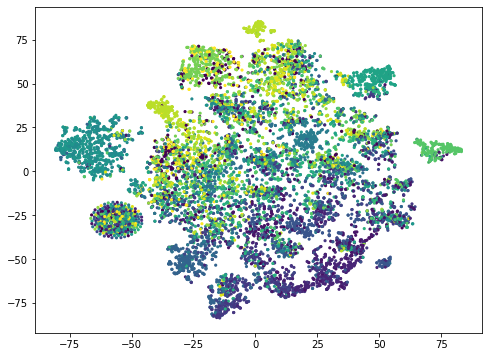

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()

## Kesimpulan :

*Topic modelling* ini bertujuan untuk mengidentifikasi setiap dokumen pada clusterisasi topik atau *newsgroup*. Pada visualisasi data pada dataset, ditunjukkan bahwa titik/dot merepresentasikan dokumen dan warna merepresentasikan ke-20 topik atau *newsgroup*. Berdasarkan grafik plot yang ada, terdapat titik dan warna yang sudah dapat dinyatakan sebagai suatu "cluster", seperti pada koordinat (-75,0), yang mana dapat ditarik kesimpulan bahwa warnanya cenderung sama dan terdapat dalam kelompok yang sama. Hal tersebut menunjukkan bahwa model ini sudah mencapai tujuan awal dan dapat dikatakan pula model ini memiliki hasil yang cukup baik dalam *topic modelling*.